<a href="https://colab.research.google.com/github/rdkdaniel/Basics-of-ML-DL-Models/blob/main/Train_Test_Split_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Key read: https://builtin.com/data-science/train-test-split

In [ ]:
#Train test split is a model validation procedure.
#It allows one to simulate how a model performs on unseen(new) data.
#The procedure is as follows

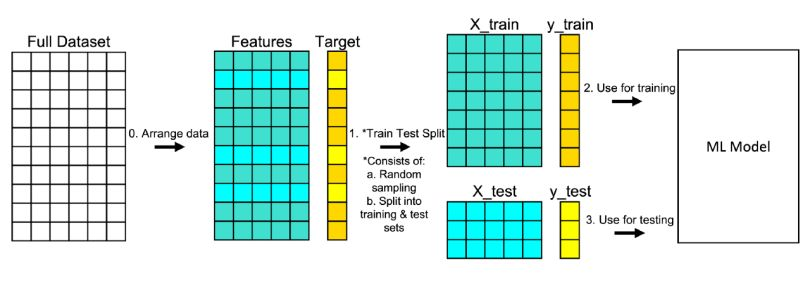

**Feature and Target**

Features or variables or attributes are the measured inputs of the problem domain, i.e. ***the independent variables***. 

The target variable is the dependent variable or the measure a model is trying to forecast. [NB: Not all problems can be or need to be formulated in such a way]

# **Steps involved**

Step 1: Arrangement of data

In [ ]:
#Data should be in acceptable format for train-test-split. 
#In scikit-learn, this involves separating the entire dataset into “Features” and “Target.”

Step 2: Split the dataset

In [ ]:
#Divide the dataset into two pieces — a training set and a testing set
#This consists of random sampling without replacement about 75 percent of the rows goes into the training set. 
#The remaining 25 percent is put into the test set.
#NB - the colors in “Features” and “Target” indicate where their data will go (“X_train,” “X_test,” “y_train,” “y_test”) for a particular train test split (diagram above)

Step 3: Train the model

In [ ]:
#Train the model on the training set. 
#This is “X_train” and “y_train” in the image.

Step 4: Test the model

In [ ]:
#Test the model on the testing set (“X_test” and “y_test” in the image) and evaluate the performance.

# **Consequences of Not Using this procedure (Train Test Split)**

In [ ]:
#i.e. Not using train test split and instead train and test the model on the same data

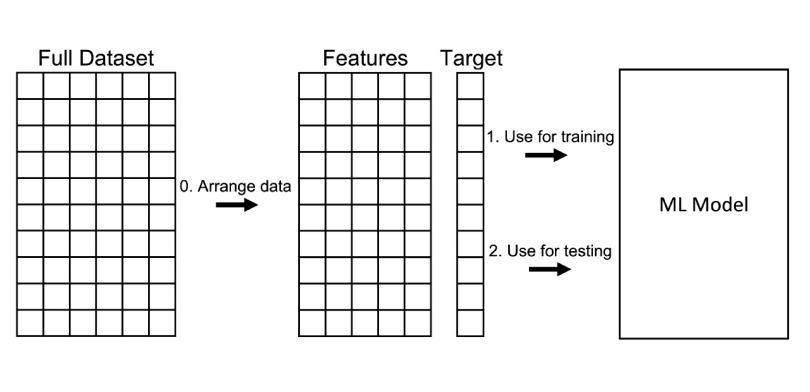

When testing the model, overfitting would emerge i.e. the model perform poorly on new data.

Diagram below highlights this problem. Green line indicating the model follows the training the training data

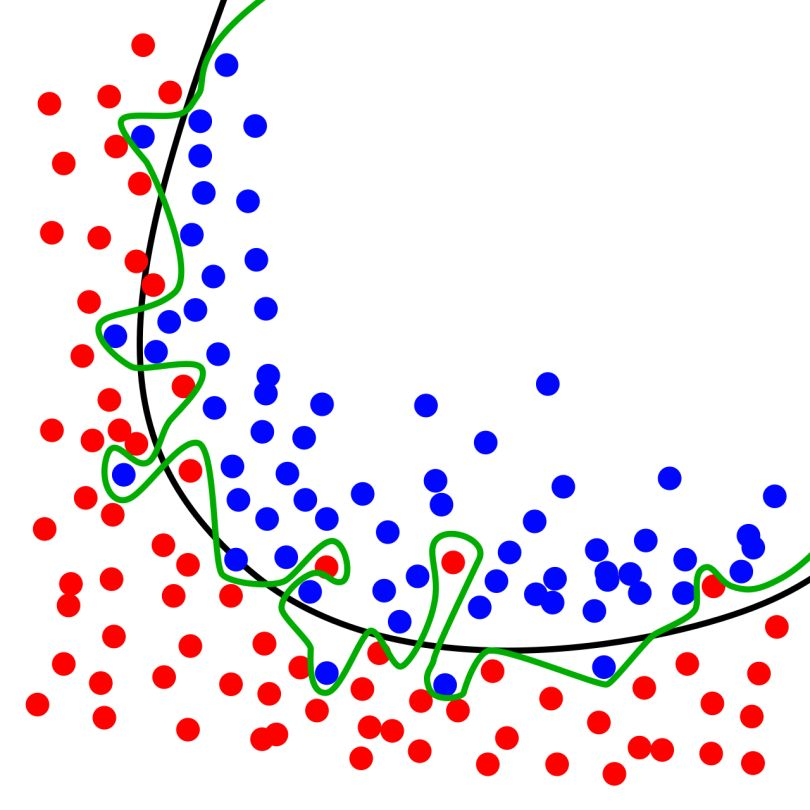

In [ ]:
#On the problem of overfitting and counterpart underfitting, article below is interesting
#https://builtin.com/data-science/bias-variance-tradeoff
#Talks of bias and variance tradeoff
#The former describing how well a model matches the training set - which means
#Bias comes from models that are overly simple and fail to capture the trends present in the data set.
#While the latter describes how much a model changes when you train it using different portions of your data set- which means
#Variance comes from models that are highly complex and employ a significant number of features.

#There has to be a tradeoff of this two in any model.

# **Train Test Split In Python**

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)

In [3]:
# Selecting columns I am interested in
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']
df = df.loc[:, columns]
df.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
5,4,4.50,5420,101930,1.0,1225000.0
6,3,2.25,1715,6819,2.0,257500.0
7,3,1.50,1060,9711,1.0,291850.0
8,3,1.00,1780,7470,1.0,229500.0
9,3,2.50,1890,6560,2.0,323000.0


**Arrange data to features and targets**

In [4]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
X = df.loc[:, features]
y = df.loc[:, ['price']]

**Split data to training and test**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

**Import model**

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
#Making model instance
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

In [8]:
#training model on data
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [9]:
#Predict labels of unseen data
# Predicting multiple observations
reg.predict(X_test[0:10])

array([ 406622.58288211, 1095030.54807692,  406622.58288211,
        406622.58288211,  657115.94280443,  406622.58288211,
        406622.58288211,  657115.94280443,  657115.94280443,
       1095030.54807692])

In [11]:
X_test.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
17384,2,1.5,1430,1650,3.0


In [10]:
# predict 1 observation.
reg.predict(X_test.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([406622.58288211])

**Measure train test split performance**

In [12]:
score = reg.score(X_test, y_test)
print(score)

0.4380405655348807


**Trying a different split**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
#Making model instance
reg2 = DecisionTreeRegressor(max_depth = 2, random_state = 0)

In [16]:
#training model on data
reg2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [17]:
#Predict labels of unseen data
# Predicting multiple observations
reg2.predict(X_test[0:10])

array([ 406947.96648543, 1113362.73434992,  406947.96648543,
        406947.96648543,  658776.6914642 ,  406947.96648543,
        406947.96648543,  658776.6914642 ,  658776.6914642 ,
       1113362.73434992])

In [18]:
X_test.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
17384,2,1.5,1430,1650,3.0


In [19]:
# predict 1 observation.
reg2.predict(X_test.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([406947.96648543])

In [20]:
#Measuring the split performance
score = reg2.score(X_test, y_test)
print(score)

0.43008626281865614


# Observation from changing train_test split ratio

**Same value as before, actually, the current split led to a worse performance.**

**Model 2 - MLP**

In [21]:
#multi-layer perceptron (MLP)
from sklearn.neural_network import MLPClassifier

In [22]:
#Making model instance
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [23]:
#training model on data
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [24]:
#Predict labels of unseen data
# Predicting multiple observations
clf.predict(X_test[0:10])

array([350000., 350000., 350000., 350000., 350000., 350000., 350000.,
       350000., 350000., 350000.])

In [25]:
X_test.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
17384,2,1.5,1430,1650,3.0


In [26]:
# predict 1 observation.
clf.predict(X_test.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([350000.])

**Measure train test split performance**

In [27]:
score = clf.score(X_test, y_test)
print(score)

0.008790191996298867


**Model 3 - Randomforest**

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=5)

In [30]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [31]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train, y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.051
Random forest: Accuracy on test Data: 0.011


**Model 4 - XGBoost classifier**

In [32]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(learning_rate=0.4, max_depth=7, objective='multi:softprob')

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

**Model 5 - Autoencoder Neural Network**

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)

In [ ]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

In [ ]:
#creating dataframe to compare models with columns created showing their performance
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

In [ ]:
#Sorting the datafram on accuracy
##Whats up with the Autoencoder??
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)